In [1]:
import pandas as pd
import quandl
import math, datetime
import time
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from matplotlib import style
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
style.use('ggplot')
df = quandl.get('SSE/AMZ',authtoken='_wr9eoMabhX7_bQTi2J9')
print(df.head())   

              High     Low    Last  Previous Day Price  Volume
Date                                                          
2014-03-20  269.80  267.20  267.83              272.26     NaN
2014-03-21  269.30  264.23  264.23              267.83     NaN
2014-03-24  261.30  254.23  254.23              261.09     NaN
2014-03-25  259.08  253.31  256.06              254.23     NaN
2014-03-26  258.75  248.50  248.50              256.06     NaN


               High      Low     Last  Previous Day Price  Volume
Date                                                             
2018-08-06  1598.12  1578.67  1598.12             1577.55   625.0
2018-08-07  1611.92  1596.67  1606.35             1598.12   195.0
2018-08-08  1624.72  1603.55  1624.46             1606.35   457.0
2018-08-09  1656.73  1620.36  1647.20             1624.46  1655.0
2018-08-10  1660.00  1649.00  1652.69             1647.20   572.0


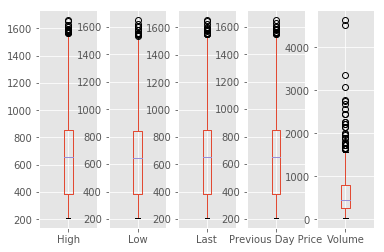

In [3]:
print(df.tail())
df.plot(kind='box',subplots=True,layout=(1,5),sharex=False,sharey=False)
import matplotlib.pyplot as plt
plt.show()

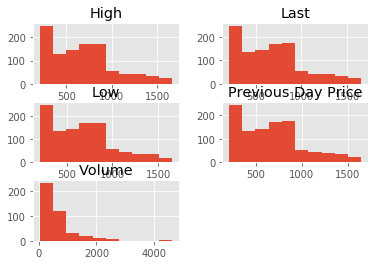

In [4]:
df.hist()
plt.show()

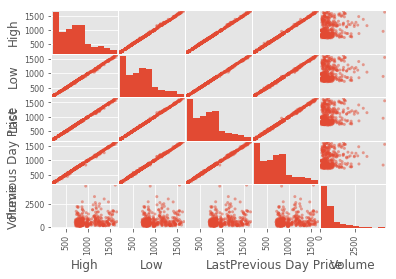

In [5]:
scatter_matrix(df)
plt.show()
df['OC_Change']=(df['Last']-df['Previous Day Price'])/df['Previous Day Price']*100
df['HL_Change']=(df['High']-df['Low'])/df['Low']*100
df=df[['Last','HL_Change','OC_Change','Volume']]

In [6]:
forecast_col='Last'
df.fillna(-9999, inplace=True)
forecast_out=int(math.ceil(0.01*len(df)))
df['label']=df[forecast_col].shift(-forecast_out)

In [7]:
X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out:]

In [8]:
df.dropna(inplace=True)
y=np.array(df['label'])

In [9]:
X_train, X_test, y_train, y_test=cross_validation.train_test_split(X, y, test_size=0.2)

clf=LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
accuracy=clf.score(X_test,y_test)

print(accuracy)

0.9896349989874782


In [10]:
forecast_set=clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)
df['Forecast']=np.nan

[1599.04625285 1553.10490888 1547.28440689 1558.80671199 1614.20735609
 1604.22122856 1625.92278568 1633.16377907 1652.64510364 1679.06363718
 1679.64554784] 0.9896349989874782 11


In [11]:
last_date=df.iloc[-1].name
last_unix=last_date.timestamp()
one_day=86400
next_unix=last_unix+one_day

In [12]:
for i in forecast_set:
	next_date=datetime.datetime.fromtimestamp(next_unix)
	next_unix+=one_day
	df.loc[next_date]=[np.nan for _ in range(len(df.columns)-1)]+[i]

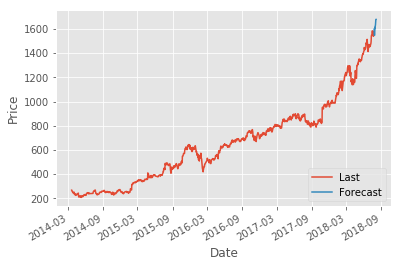

In [13]:
df['Last'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()